# How to use Lipschitzian modelling

In [1]:
import numpy as np
import pandas as pd
from desdeo_problem.surrogatemodels.lipschitzian import LipschitzianRegressor
import matplotlib.pyplot as plt

In [2]:
def y_func(x):
    return(np.sin(x) + np.sin(2*x))

In [3]:
num_points = 20
x = np.linspace(0, 2 * np.pi, num_points).reshape(-1,1)
y = y_func(x)
data = pd.DataFrame(np.hstack((x,y)), columns = ['x','y'])

In [4]:
model = LipschitzianRegressor()

In [5]:
model.fit(X=data['x'], y = data['y'])

In [6]:
model.L

2.8392177826759726

In [7]:
model.y

array([[ 0.00000000e+00],
       [ 9.38912182e-01],
       [ 1.58361298e+00],
       [ 1.75293980e+00],
       [ 1.44534766e+00],
       [ 8.31989903e-01],
       [ 1.80049416e-01],
       [-2.60860582e-01],
       [-3.61219085e-01],
       [-1.60104879e-01],
       [ 1.60104879e-01],
       [ 3.61219085e-01],
       [ 2.60860582e-01],
       [-1.80049416e-01],
       [-8.31989903e-01],
       [-1.44534766e+00],
       [-1.75293980e+00],
       [-1.58361298e+00],
       [-9.38912182e-01],
       [-7.34788079e-16]])

In [8]:
x_new = np.linspace(0, 2*np.pi, 1000).reshape(-1,1)
y_new_true = y_func(x_new)
y_mean, y_delta = model.predict(x_new)

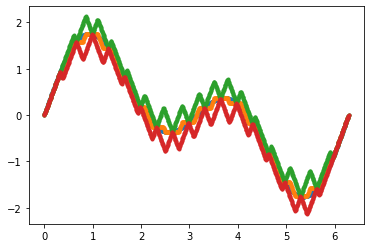

In [9]:
plt.scatter(x_new, y_new_true, marker='.')
plt.scatter(x_new, y_mean, marker='.')
plt.scatter(x_new, y_mean + y_delta, marker='.')
plt.scatter(x_new, y_mean - y_delta, marker='.')

In [10]:
def y_func2d(x):
    return(np.sin(x[:,0]) + np.sin(2*x[:,1]))

In [11]:
x = np.random.rand(200,2)
y = y_func2d(x).reshape(-1,1)
data = pd.DataFrame(np.hstack((x,y)), columns = ['x1', 'x2','y'])

In [12]:
model = LipschitzianRegressor()
model.fit(X=data[['x1', 'x2']], y = data['y'])

In [13]:
x_new = np.random.rand(2000,2)
y_new_true = y_func2d(x_new).reshape(-1,1)
y_predict, y_delta = model.predict(x_new)

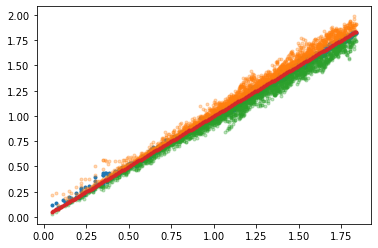

In [14]:
line = np.linspace(y_new_true.min(),y_new_true.max(),200)
plt.scatter(y_new_true, y_predict.reshape(-1,1), marker=".")
plt.scatter(y_new_true, (y_predict+y_delta).reshape(-1,1), marker=".", alpha=0.3)
plt.scatter(y_new_true, (y_predict-y_delta).reshape(-1,1), marker=".", alpha=0.3)
plt.scatter(line,line, marker='.')